In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from trunk_filter.composite_filter import NonCausalTrunkFilter
from trunk_filter.utils import integrate_positions_from_velocity, get_data_array_from_dataframe, get_dataframe_from_data_array

In [ ]:
df = pd.read_csv('../data/overfit-mn-1e1-short-05-dt/test/1/raw/data.csv')
df1 = pd.read_csv('../data/overfit-mn-1e1-short-05-dt/train/raw/data.csv')
index = 4

In [56]:
start = int(0)
delta = 10000
df = df.iloc[start:start+delta]
df1 = df1[start:start+delta]

len(df1)


39

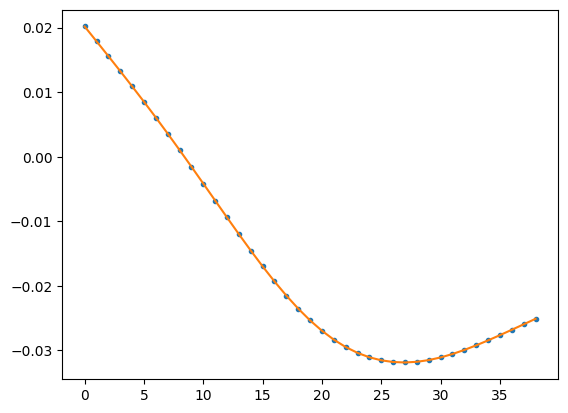

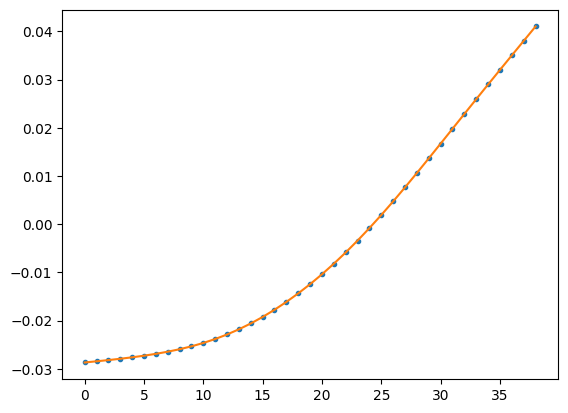

In [57]:
plt.plot(df[f'x{index}'], label='x3', linestyle='None', marker='.')
plt.plot(df1[f'x{index}'], label='x3 (mass 10g)')


plt.figure()
plt.plot(df['y4'], label='y3', linestyle='None', marker='.')
plt.plot(df1['y4'], label='y3 (mass 10g)')


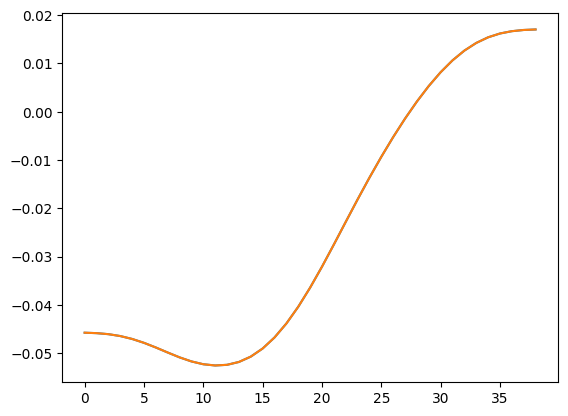

In [58]:
plt.plot(df[f'vx{index}'], label='x3')
plt.plot(df1[f'vx{index}'], label='x3 (mass 100g)')


/tmp/ipykernel_50312/324489957.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


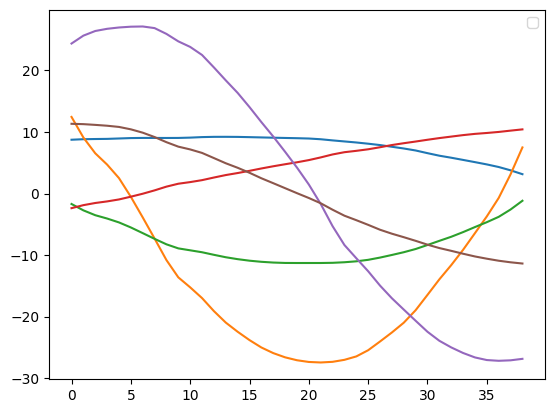

In [59]:
plt.plot(df['ux1'])
plt.plot(df['ux2'])
plt.plot(df['ux3'])
plt.plot(df['uy1'])
plt.plot(df['uy2'])
plt.plot(df['uy3'])


plt.legend()

In [60]:
df['x4'].mean()


np.float64(-0.01584052062911668)

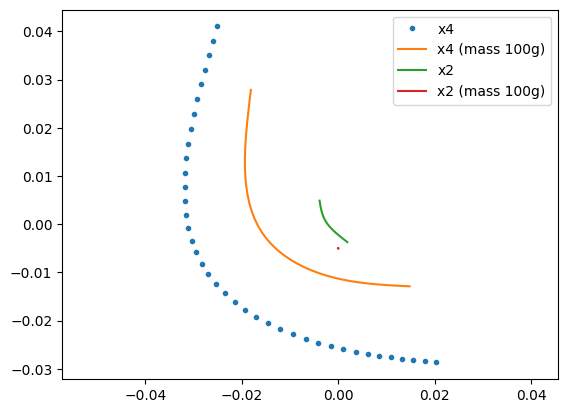

In [61]:
from datetime import datetime

plt.figure()
plt.plot(df['x4'], df['y4'], label='x4' , linestyle='None', marker='.')
plt.plot(df['x3'], df['y3'], label='x4 (mass 100g)')
plt.plot(df['x2'], df['y2'], label='x2')
plt.plot(df['x1'], df['y1'], label='x2 (mass 100g)')


plt.axis('equal')
plt.legend()
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plt.savefig(f'test2_{timestamp}.png')



In [62]:
centers = []

for i in range(1, 5):
    centers.append([df[f'x{i}'].mean(), df[f'y{i}'].mean(), df[f'z{i}'].mean()])

In [63]:
c = np.array(centers)
print(c)

[[ 5.25965021e-07 -4.99947403e-03  0.00000000e+00]
 [-1.62624603e-03  9.77991967e-05 -1.04334018e-01]
 [-8.82328968e-03  4.23480966e-04 -1.95464679e-01]
 [-1.58405206e-02 -5.04192066e-03 -3.09682225e-01]]


In [64]:
c[:,2]

array([ 0.        , -0.10433402, -0.19546468, -0.30968222])

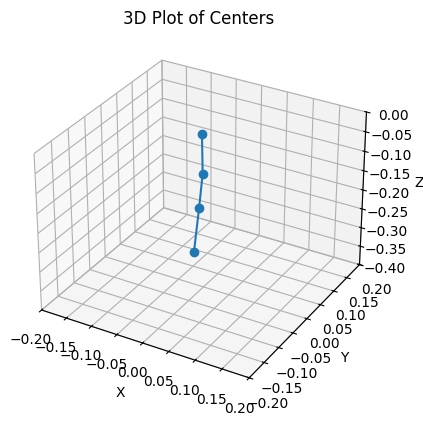

In [65]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(c[:, 0], c[:, 1], c[:, 2], marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Centers')

ax.set_xlim([-0.2, 0.2])
ax.set_ylim([-0.2, 0.2])
ax.set_zlim([-0.4, 0.0])
plt.show()

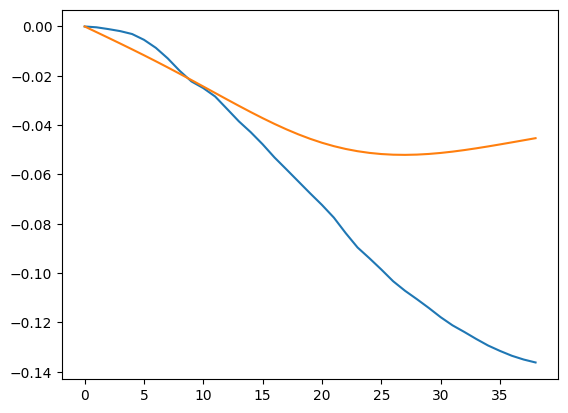

In [66]:
plt.plot(df['uy3']/1000 * 6 -(df['uy3'].iloc[0]/1000*6))

plt.plot(df['x4'] - df['x4'].iloc[0])


In [67]:
df['x4'] + df['vx4_new'] * 0.05 - df['x4_new']

0    -3.469447e-17
1    -1.734723e-18
2    -1.040834e-17
3     3.989864e-17
4    -3.469447e-18
5    -3.122502e-17
6     1.517883e-17
7     4.445229e-17
8    -1.251169e-16
9     3.469447e-17
10   -3.469447e-17
11    3.469447e-17
12   -4.336809e-17
13    1.908196e-17
14   -3.469447e-18
15   -3.122502e-17
16    2.775558e-17
17    2.081668e-17
18   -6.938894e-18
19    3.469447e-18
20    3.469447e-18
21   -3.469447e-18
22    0.000000e+00
23    5.898060e-17
24   -9.714451e-17
25    3.469447e-17
26    2.775558e-17
27   -1.387779e-17
28    6.938894e-18
29   -6.938894e-17
30    2.081668e-17
31    5.204170e-17
32   -5.551115e-17
33    3.816392e-17
34   -5.551115e-17
35    6.938894e-18
36    2.428613e-17
37   -4.857226e-17
38    8.326673e-17
dtype: float64